# Image Data & Preprocessing

## Contents
- [Imports](#Imports)
- [High-Grade Gliomas](#High-Grade-Gliomas-(HGG))
- [Low-Grade Gliomas](#Low-Grade-Gliomas-(LGG))
- Preprocessing
    - [Bias Field Correction](#Preprocessing:-Bias-Field-Correction)
    - [Skull Stripping](#Preprocessing:--Skull-Stripping)
    - [Smoothing](#Preprocessing:-Smoothing)

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import ants

from nilearn import plotting
from deepbrain import Extractor
from nipype import Node, Workflow
from nipype.interfaces.fsl import BET, IsotropicSmooth

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## High-Grade Gliomas (HGG)
- Gliomas are tumors.
- HGG are tumors that grow at a high rate.

In [2]:
# HGG Train
# Creating folder path for each folder in directory
folder_contents_path = [('data/MICCAI_BraTS_2019_Data_Training/HGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/HGG') if 'BraTS19' in file_name]

In [14]:
# Getting all image data from HGG Training
hgg_img_data_train = []

for folder_path in folder_contents_path:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:
            
            # N4 Bias Field Correction
            img_raw = ants.image_read(file_path)
            n4_file_path = 'data/n4_processed/' + str(file[:-7]) + '_n4' + str(file[-7:])
            ants.n4_bias_field_correction(img_raw).to_file(n4_file_path)

In [20]:
# Skull Stripping using BET from previously N4 bias corrected files
n4_path = 'data/n4_processed/'
os.listdir(n4_path)

error_list = []

for file in os.listdir(n4_path):
    if file.endswith('t1_n4.nii.gz') or file.endswith('t2_n4.nii.gz') or file.endswith('flair_n4.nii.gz') or file.endswith('t1ce_n4.nii.gz'):
        bet_file_path = 'data/bet_processed/' + str(file[:-7]) + '_bet' + str(file[-7:])
        in_file_path = n4_path + file
        
        try:
            BET(in_file=in_file_path,
               out_file = bet_file_path).run()
            
        except:
            error_list.append(in_file_path)
            pass

191121-09:10:48,562 nipype.interface INFO:
	 stderr 2019-11-21T09:10:48.562198:/usr/local/fsl/bin/bet: line 393: 90930 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
191121-09:10:48,821 nipype.interface INFO:
	 stdout 2019-11-21T09:10:48.821064:Error. Expected to find bet2 output (data/bet_processed/BraTS19_TCIA02_473_1_t1ce_n4_bet), but it did not exist. Perhaps this is a writing issue or memory issue
191121-09:18:34,743 nipype.interface INFO:
	 stderr 2019-11-21T09:18:34.743685:/usr/local/fsl/bin/bet: line 393:  4453 Segmentation fault: 11  ${FSLDIR}/bin/bet2 $IN $OUT $bet2opts
191121-09:18:35,22 nipype.interface INFO:
	 stdout 2019-11-21T09:18:35.021967:Error. Expected to find bet2 output (data/bet_processed/BraTS19_TCIA02_473_1_t2_n4_bet), but it did not exist. Perhaps this is a writing issue or memory issue
191121-09:31:06,206 nipype.interface INFO:
	 stderr 2019-11-21T09:31:06.205913:/usr/local/fsl/bin/bet: line 393: 26159 Segmentation fault: 11  ${FSLDIR}/bin/bet2

In [21]:
# Folder BraTS19_TCIA02_473_1 has corrupt files that cannot be preprocessed
# Won't include in model
error_list

['data/n4_processed/BraTS19_TCIA02_473_1_t1ce_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_t2_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_t1_n4.nii.gz',
 'data/n4_processed/BraTS19_TCIA02_473_1_flair_n4.nii.gz']

## Low-Grade Gliomas (LGG)
- Gliomas are tumors.
- LGG are tumors that grow at a slow rate.

In [4]:
# LGG Train
# Creating folder path for each folder in directory
folder_contents_path2 = [('data/MICCAI_BraTS_2019_Data_Training/LGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/LGG') if 'BraTS19' in file_name]


# Getting all image data from LGG Training
lgg_img_data_train = []

for folder_path in folder_contents_path2:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:

            # N4 Bias Field Correction
            img_raw = ants.image_read(file_path)
            n4_file_path = 'data/lgg_n4_processed/' + str(file[:-7]) + '_n4' + str(file[-7:])
            ants.n4_bias_field_correction(img_raw).to_file(n4_file_path)

In [2]:
# Skull Stripping using BET from previously N4 bias corrected files
n4_path = 'data/lgg_n4_processed/'
os.listdir(n4_path)

error_list_lgg = []

for file in os.listdir(n4_path):
    if file.endswith('t1_n4.nii.gz') or file.endswith('t2_n4.nii.gz') or file.endswith('flair_n4.nii.gz') or file.endswith('t1ce_n4.nii.gz'):
        
        bet_file_path = 'data/lgg_bet_processed/' + str(file[:-7]) + '_bet' + str(file[-7:])
        in_file_path = n4_path + file
        
        try:
            BET(in_file=in_file_path,
               out_file = bet_file_path).run()
            
        except:
            error_list_lgg.append(in_file_path)
            pass

In [3]:
# No files were corrupt / returned errors
error_list_lgg

[]

In [12]:
# Length of each list / type of brain tumors

print(f' Length of HGG Train List: {len(hgg_img_data_train)}')
print(f' Length of LGG Train List: {len(lgg_img_data_train)}')

 Length of HGG Train List: 1295
 Length of LGG Train List: 380


## Preprocessing: Bias Field Correction
- this section and the sections following serves the purpose of further explaining what happened in the codes previously
- BraTS2019 data description explicitly states that the scans were acquired from various scanners from 19 different institutions
- accouting for inconsistent intensities across scans due to scanner error
- will correct these scanner errors using N4 Bias Field Correction

In [2]:
# Reading in one brain image (flair MRI)
# Type of MRI for this preprocess arbitrary
# Visual/explanatory purpose only
# Brain Location/ID: BraTS19_2013_2_1
img_raw = ants.image_read('./data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz')


In [3]:
# Dimensions of this image (and all others are similar)
img_raw

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, -239.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

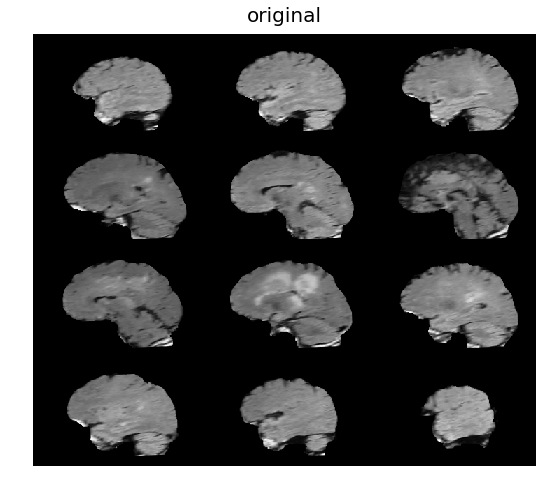

In [10]:
# The raw image file before any preprocessing
ants.plot(img_raw, title = 'original')

The image above shows the original Flair MRI of a single brain. No preprocessing has been done to this image file.

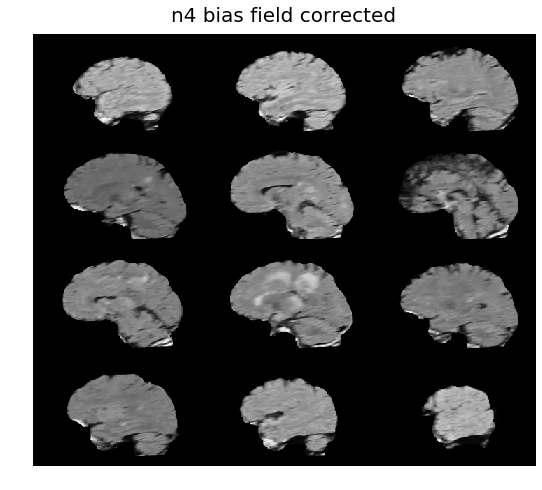

In [11]:
# The same image as above, after N4 Bias Field Correction
ants.n4_bias_field_correction(img_raw).plot(title='n4 bias field corrected')


The image above shows the same Flair MRI of the same brain from above **after** N4 Bias Field Correction. We can see the difference in intensities for various parts of the brain.

## Preprocessing:  Skull Stripping
- Using BET (Brain Extraction Tool)
- looking specifically at the brain
- eliminiting noise from the model by removing the skull
- only preprocessed the T1, T2, T1CE, and FLAIR images
- segmented images do not have a skull to remove from the image

In [5]:
# Have to use this version to use deepbrain.
# !pip install tensorflow==1.15.0

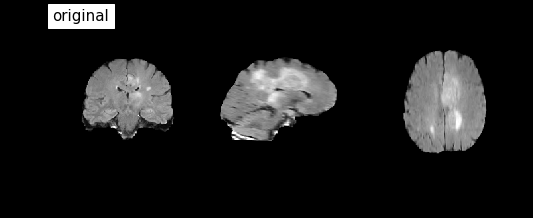

In [2]:
# The original flair mri image of a single brain
# MRI type shown is arbitrary, only for explanatory purposes
# Brain Location/ID: BraTS19_2013_2_1
plotting.plot_anat('./data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The MRI image shown above is an **original** image of a single brain without any preprocessing applied. We can see faint lines indicating where the skull is.

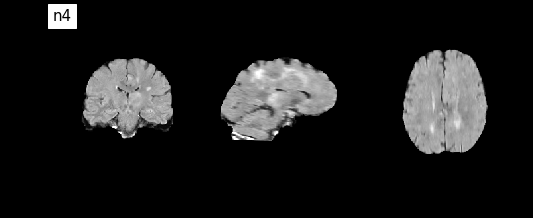

In [5]:
# After N4 bias correcting the same image above
# Note: this is the same brain shown in the N4 Bias Correction Section
plotting.plot_anat('./data/n4_processed/BraTS19_2013_2_1_flair_n4.nii.gz', title='n4 corrected',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the original image after **N4 Bias Correction**. This is the same brain used for demonstration in the N4 Bias Correction Section.

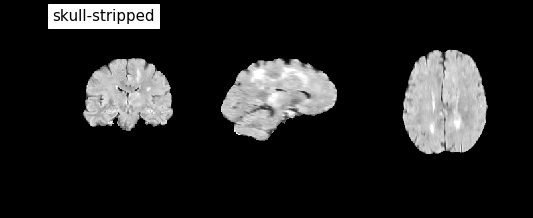

In [6]:
# After skull stripping the n4 corrected image
plotting.plot_anat('./data/bet_processed/BraTS19_2013_2_1_flair_n4_bet.nii.gz', title='skull-stripped',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the same image above after **skull stripping** using BET (Brain Extraction Tool). Compared to the previous image, there are no longer faint lines representing the skull around the brain. This will help eliminate noise from the model.

# Preprocessing: Smoothing
- Brain Location/ID: BraTS19_2013_2_1
- MRI type (flair) and brain chosen arbitrary for demonsatration/explanatory purposes
- Smoothing the MRI images procduced after skull stripping
- Smoothing using Isotropic (Gaussian) smoothing replaces each data point by a local average of surrounding points
- Full Width at Half Maximum (FWHM) parameter adjusted for smoothing (0.5,1,2,3) -- determines how much of the data to smooth
- I have decided not to include this in my model because doing so blurs the line between tumor and brain and reduces fine image detail.

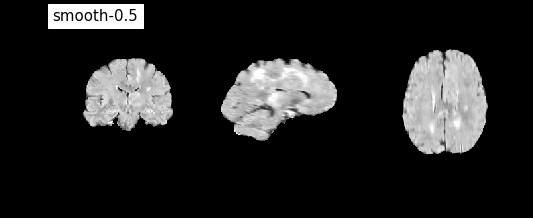

In [19]:
# Using FSL's smoothing method at 0.5 FWHM
IsotropicSmooth(in_file = './data/bet_processed/BraTS19_2013_2_1_flair_n4_bet.nii.gz',
               out_file = './data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth0_50.nii.gz',
               fwhm=0.5).run()

plotting.plot_anat('./data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth0_50.nii.gz', title='smooth-0.5',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the same image from skull stripping after **smoothing** with a **fwhm of 0.5**.

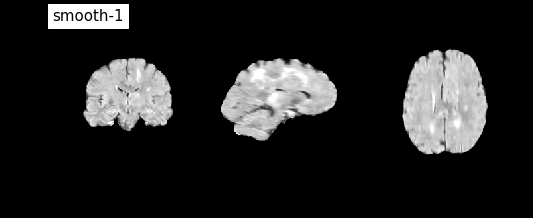

In [20]:
# Using FSL's smoothing method at 1 FWHM
IsotropicSmooth(in_file = './data/bet_processed/BraTS19_2013_2_1_flair_n4_bet.nii.gz',
               out_file = './data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth.nii.gz',
               fwhm=1).run()

plotting.plot_anat('./data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth.nii.gz', title='smooth-1',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the same image from skull stripping after **smoothing** with a **fwhm of 1**.

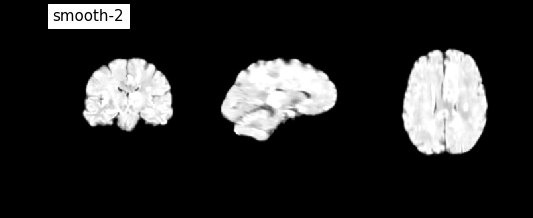

In [21]:
# Using FSL's smoothing method at 2 FWHM
IsotropicSmooth(in_file = './data/bet_processed/BraTS19_2013_2_1_flair_n4_bet.nii.gz',
               out_file = './data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth2.nii.gz',
               fwhm=2).run()

plotting.plot_anat('./data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth2.nii.gz', title='smooth-2',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the same image from skull stripping after **smoothing** with a **fwhm of 2**.

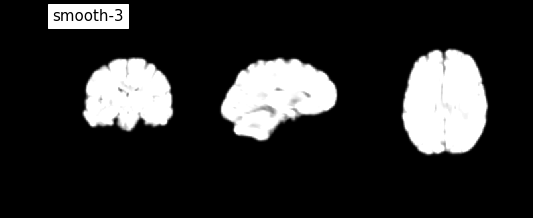

In [22]:
# Using FSL's smoothing method at 3 FWHM
IsotropicSmooth(in_file = './data/bet_processed/BraTS19_2013_2_1_flair_n4_bet.nii.gz',
               out_file = './data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth3.nii.gz',
               fwhm=3).run()

plotting.plot_anat('./data/smooth_test/BraTS19_2013_2_1_flair_n4_bet_smooth3.nii.gz', title='smooth-3',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

The image above shows the same image from skull stripping after **smoothing** with a **fwhm of 2**. It is evident that smoothing reduces the fine quality of the brain image. I have decided that I do not want to blur the lines between what is brain and what is a tumor for my MRI scans adn therefore will not be implementing this preprocessing method to my data.